In [126]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt

In [13]:
# Importing test and train databases

test = pd.read_csv(r"C:\Users\laila\Documents\ONCASE\Cientista de dados\classification_data\classification_test.csv")
train = pd.read_csv(r"C:\Users\laila\Documents\ONCASE\Cientista de dados\classification_data\classification_train.csv")

train.head()

,x1,x2,target
0,1.934224,-0.111822,1
1,1.767383,-0.976402,1
2,0.937101,-0.085633,1
3,1.340732,0.166960,1
4,-0.199901,-0.155204,1


In [14]:
# Splitting features and target of train dataset

X_train = train.iloc[:, 0:2]
Y_train = train.iloc[:, 2]

# Splitting features and target of test dataset

X_test = test.iloc[:, 0:2]
Y_test = test.iloc[:, 2]


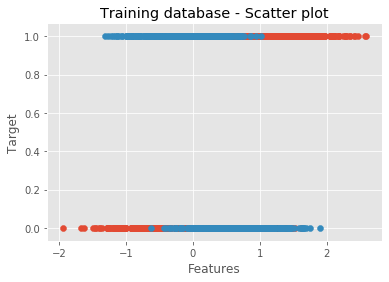

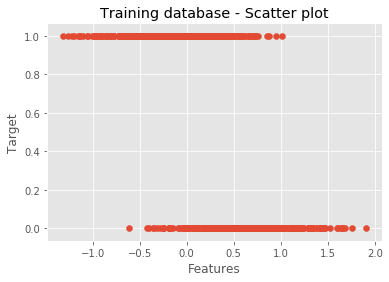

In [142]:
# Identifying relations between the features and the target

plt.figure()
plt.scatter(X_train["x1"], Y_train)
plt.scatter(X_train["x2"], Y_train)
plt.title("Training database - Scatter plot")
plt.xlabel("Features")
plt.ylabel("Target")
plt.show()

plt.figure()
plt.scatter(X_train["x2"], Y_train)
plt.title("Training database - Scatter plot")
plt.xlabel("Features")
plt.ylabel("Target")
plt.show()

In [51]:
# Iniciating the neural network model

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(2,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

In [52]:
# Compiling the model

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [123]:
# Fitting and evaluating the model

e = 10 # Number of epochs

h = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=e, batch_size=1)

test_loss, test_acc = model.evaluate(X_test, Y_test)

# Predicting the model using the test dataset

Pred_Y = np.around(model.predict(X_test), decimals=0)

# Evaluation using the metrics precision, recall, f2-score and support

print("\nEvaluating the model...\n\n")
evaluation = np.array(precision_recall_fscore_support(Y_test, Pred_Y, beta=2.0))[:3]
pd.DataFrame(data=np.round(evaluation, 2),
             columns=list(test)[0:2],
             index=['Precision', 'Recall', 'F2-Score'])

Epoch 1/10
670/670 [==============================] - 1s 1ms/step - loss: 0.3395 - accuracy: 0.8433 - val_loss: 0.3495 - val_accuracy: 0.8394
Epoch 2/10
670/670 [==============================] - 1s 1ms/step - loss: 0.3387 - accuracy: 0.8463 - val_loss: 0.3497 - val_accuracy: 0.8394
Epoch 3/10
670/670 [==============================] - 1s 1ms/step - loss: 0.3391 - accuracy: 0.8448 - val_loss: 0.3487 - val_accuracy: 0.8394
Epoch 4/10
670/670 [==============================] - 1s 1ms/step - loss: 0.3386 - accuracy: 0.8433 - val_loss: 0.3487 - val_accuracy: 0.8394
Epoch 5/10
670/670 [==============================] - 1s 1ms/step - loss: 0.3392 - accuracy: 0.8433 - val_loss: 0.3481 - val_accuracy: 0.8394
Epoch 6/10
670/670 [==============================] - 1s 1ms/step - loss: 0.3386 - accuracy: 0.8433 - val_loss: 0.3482 - val_accuracy: 0.8394
Epoch 7/10
670/670 [==============================] - 1s 1ms/step - loss: 0.3382 - accuracy: 0.8478 - val_loss: 0.3478 - val_accuracy: 0.8424
Epoch 

,x1,x2
Precision,0.86,0.82
Recall,0.82,0.86
F2-Score,0.83,0.85
